In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../raw_data/data_clean.csv')

In [4]:
df.head(10)

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,...,world_war_i,world_war_ii,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,revenue,has_a_website
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,"['Multi-player', 'Online Multi-Player', 'Local...",['Action'],"['Action', 'FPS', 'Multiplayer']",...,0,0,0,0,550,15000000.0,10000000,20000000,107850000.0,0
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,"['Multi-player', 'Valve Anti-Cheat enabled']",['Action'],"['FPS', 'World War II', 'Multiplayer']",...,5,122,0,0,0,7500000.0,5000000,10000000,29925000.0,1
2,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,"['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],"['FPS', 'Action', 'Sci-fi']",...,0,0,0,0,0,7500000.0,5000000,10000000,29925000.0,0
3,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,"['Single-player', 'Multi-player', 'Online Mult...",['Action'],"['FPS', 'Classic', 'Action']",...,0,0,0,0,0,7500000.0,5000000,10000000,53925000.0,1
4,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,"['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],"['Action', 'FPS', 'Multiplayer']",...,0,0,0,0,0,15000000.0,10000000,20000000,107850000.0,0
5,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,['Single-player'],['Action'],"['FPS', 'Action', 'Sci-fi']",...,0,0,0,63,0,7500000.0,5000000,10000000,29925000.0,0
6,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,"['Single-player', 'Steam Achievements', 'Steam...",['Action'],"['FPS', 'Action', 'Sci-fi']",...,0,0,0,607,0,15000000.0,10000000,20000000,107850000.0,1
7,240,Counter-Strike: Source,2004-11-01,1,Valve,Valve,windows;mac;linux,"['Multi-player', 'Cross-Platform Multiplayer',...",['Action'],"['Action', 'FPS', 'Multiplayer']",...,0,0,0,0,400,15000000.0,10000000,20000000,107850000.0,0
8,300,Day of Defeat: Source,2010-07-12,1,Valve,Valve,windows;mac;linux,"['Multi-player', 'Cross-Platform Multiplayer',...",['Action'],"['FPS', 'World War II', 'Multiplayer']",...,0,272,0,0,0,7500000.0,5000000,10000000,53925000.0,1
9,340,Half-Life 2: Lost Coast,2005-10-27,1,Valve,Valve,windows;mac;linux,"['Single-player', 'Commentary available']",['Action'],"['FPS', 'Action', 'Singleplayer']",...,0,0,0,0,0,15000000.0,10000000,20000000,0.0,1


In [5]:
df.dtypes

steam_appid        int64
name              object
release_date      object
english            int64
developer         object
                  ...   
owner_median     float64
owner_lower        int64
owner_upper        int64
revenue          float64
has_a_website      int64
Length: 396, dtype: object

In [6]:
# Intervalles du nombre de téléchargement par jeu 

df['owners'].value_counts()

0-20000                18529
20000-50000             3018
50000-100000            1675
100000-200000           1367
200000-500000           1240
500000-1000000           493
1000000-2000000          286
2000000-5000000          191
5000000-10000000          42
10000000-20000000         20
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

<AxesSubplot:>

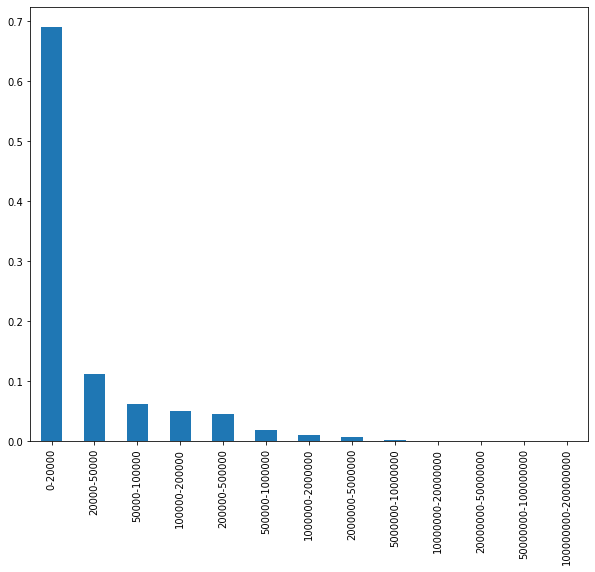

In [7]:
# Répartitions du nombre de téléchargements des jeux

df['owners'].value_counts(normalize=True).plot(kind='bar', figsize=(10,8))

In [8]:
# Convert date to datetime format

df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
df.dtypes

steam_appid               int64
name                     object
release_date     datetime64[ns]
english                   int64
developer                object
                      ...      
owner_median            float64
owner_lower               int64
owner_upper               int64
revenue                 float64
has_a_website             int64
Length: 396, dtype: object

## Distribution des 100 Developer qui ont produit le plus de jeux 

<AxesSubplot:>

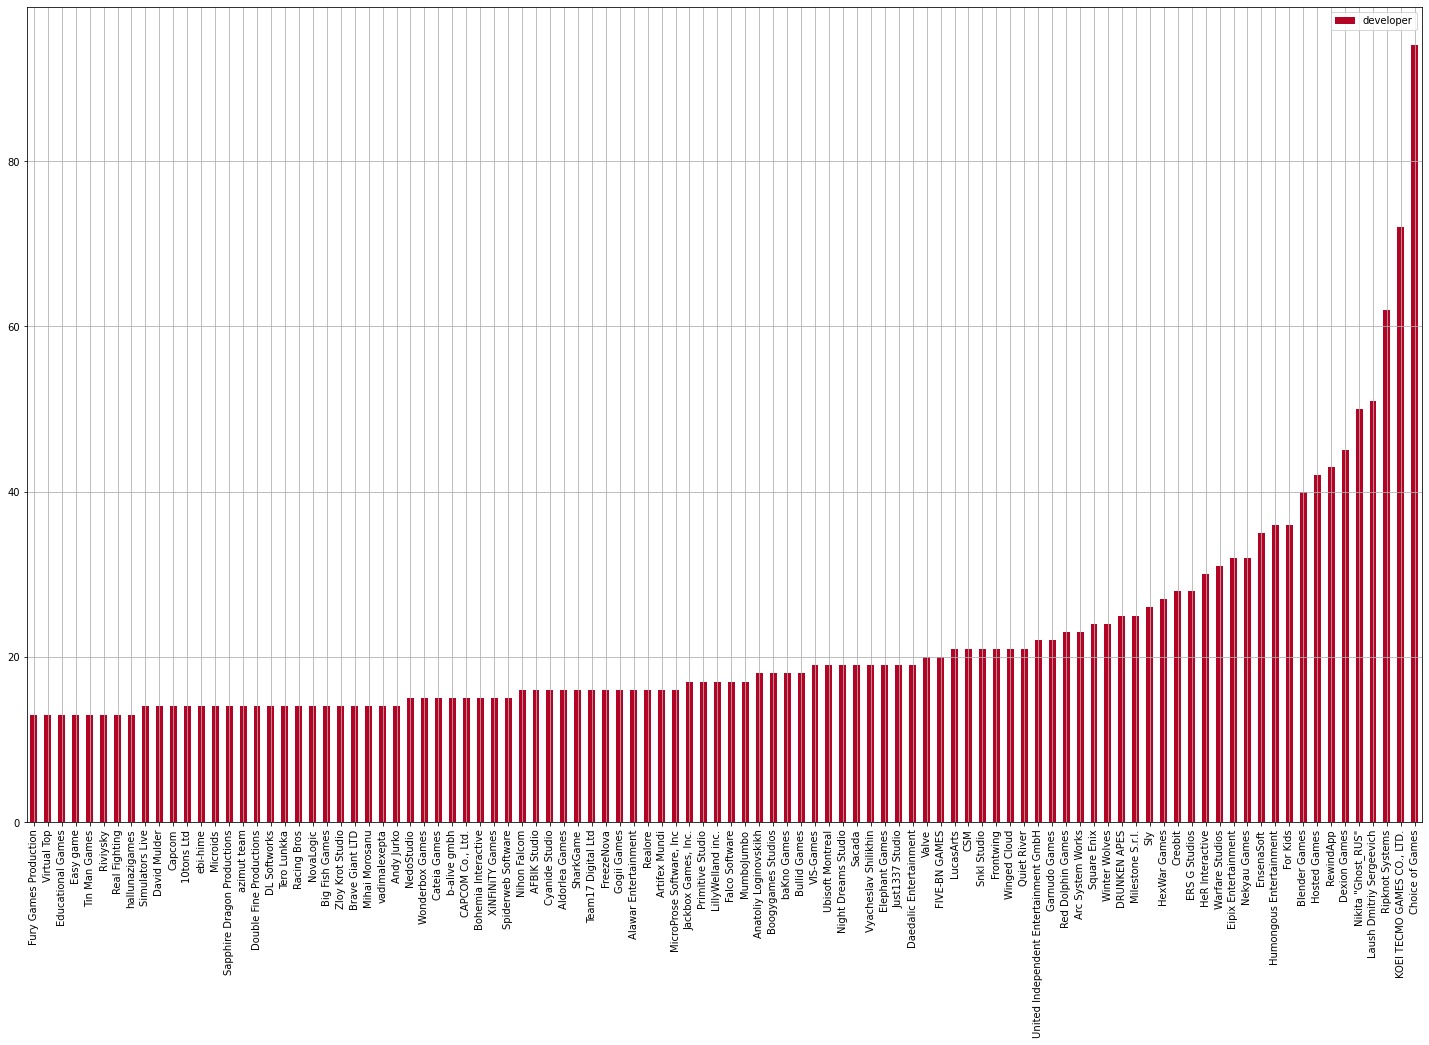

In [10]:
df['developer'].value_counts().head(100).sort_values().plot(kind = 'bar',figsize=(25,15), colormap='coolwarm_r', grid=True, legend=True)

## Distribution des 100 Developer qui ont produit le moins de jeux 


<AxesSubplot:>

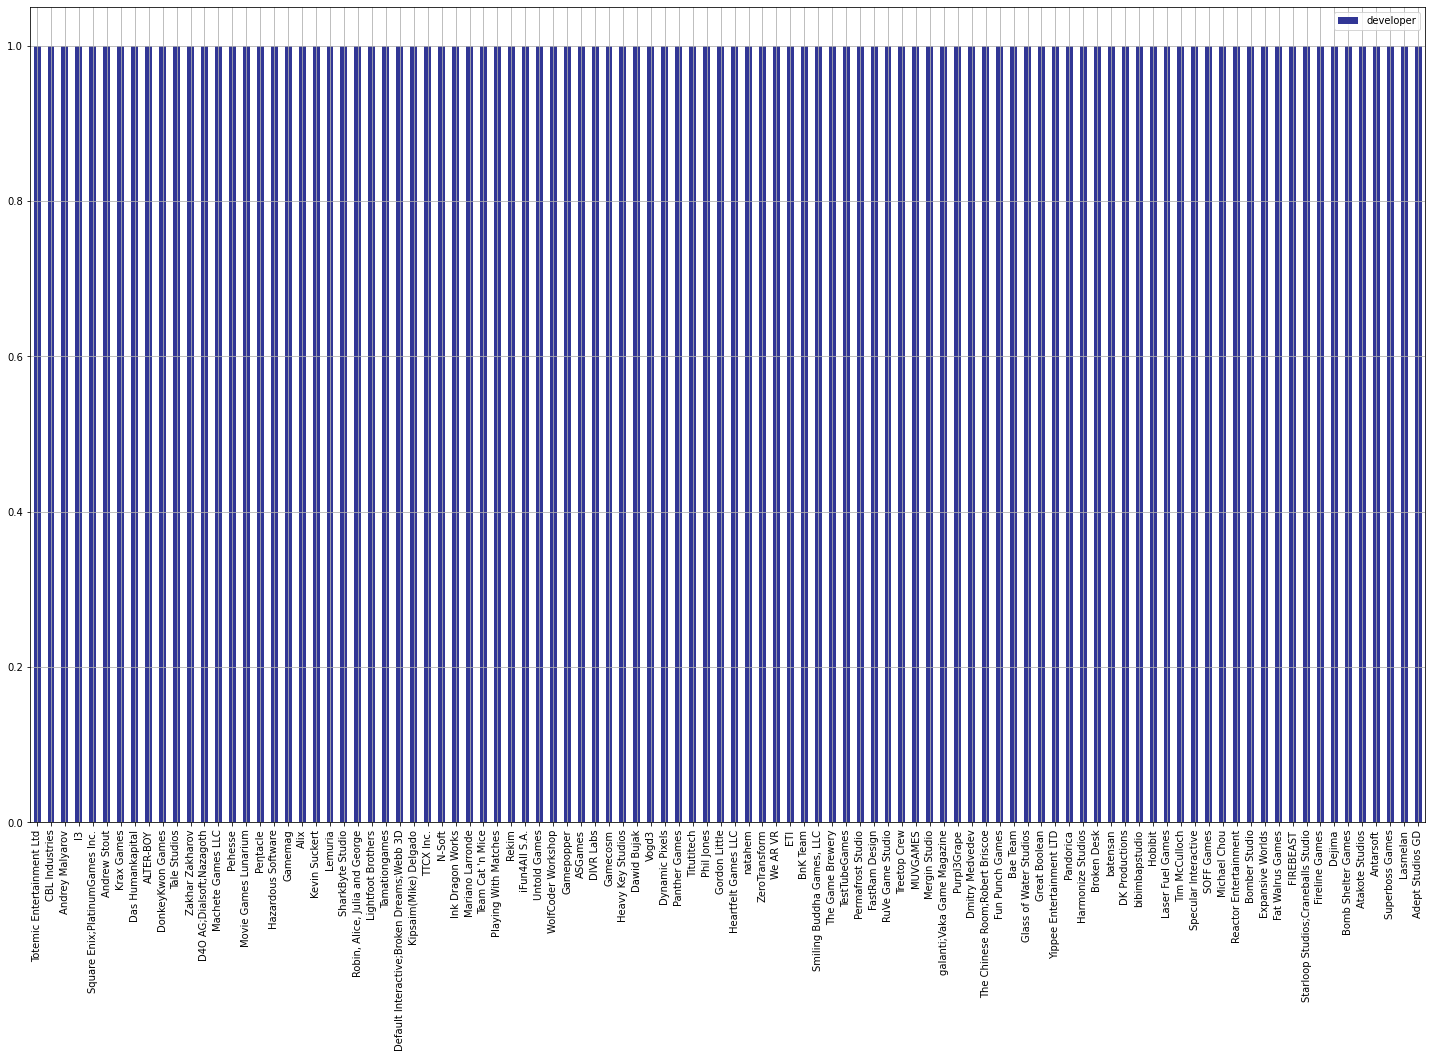

In [11]:
df['developer'].value_counts().tail(100).sort_values().plot(kind = 'bar',figsize=(25,15), colormap='RdYlBu_r', grid=True, legend=True)

In [12]:
# Nombre de developer uniques 

df['developer'].nunique()

17047

## Nombre de jeux released par année 

In [13]:
df['release_date'].min(), df['release_date'].max()

(Timestamp('1997-06-30 00:00:00'), Timestamp('2019-05-01 00:00:00'))

In [14]:
df['release_date'].dt.year.value_counts()

2018    8146
2017    6341
2016    4356
2015    2590
2019    2209
2014    1554
2013     414
2012     306
2009     266
2011     233
2010     222
2008     111
2007      62
2006      37
2005       5
2004       4
2003       3
2001       3
2002       1
2000       1
1998       1
1999       1
1997       1
Name: release_date, dtype: int64

<AxesSubplot:>

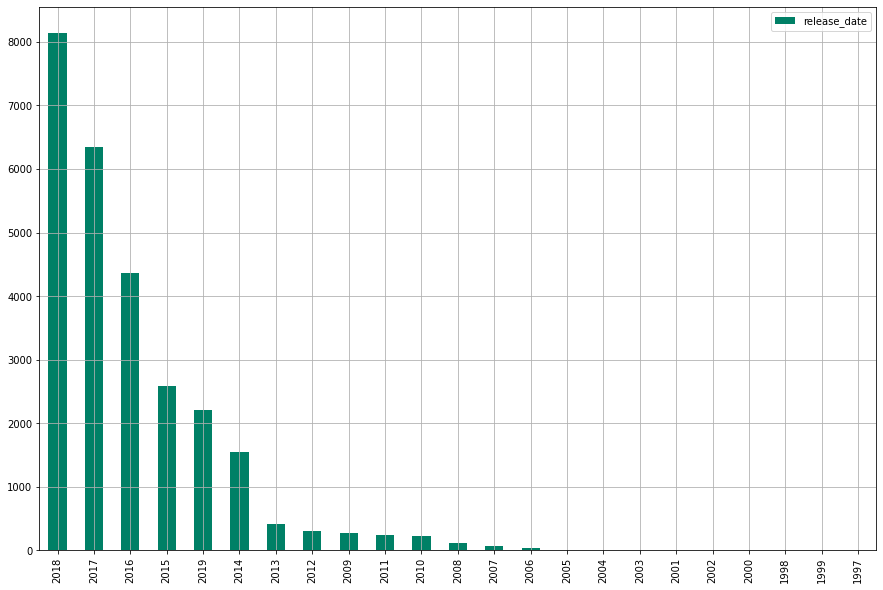

In [15]:
df['release_date'].dt.year.value_counts().plot(kind = 'bar',figsize=(15,10), colormap='summer', grid=True, legend=True)

## Répartition des Positive/Negative ratings

In [16]:
name_prate = df[['name','positive_ratings']].set_index(keys='name').sort_values(by='positive_ratings',ascending=False)

KeyError: "['positive_ratings'] not in index"

In [ ]:
name_nrate = df[['name','negative_ratings']].set_index(keys='name').sort_values(by='negative_ratings',ascending=False)

In [ ]:
name_prate.head(10).plot(kind='barh',figsize=(12,8),colormap='Dark2'),

name_nrate.head(10).plot(kind='barh',figsize=(12,8),colormap='mako')

## Répartition du price 

In [17]:
df['price'].describe()

count    26867.000000
mean         6.072688
std          7.480243
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        303.990000
Name: price, dtype: float64

In [18]:
name_price = df[['name','price']].set_index(keys='name')

In [19]:
price = df[df['price'] < 150]['price']


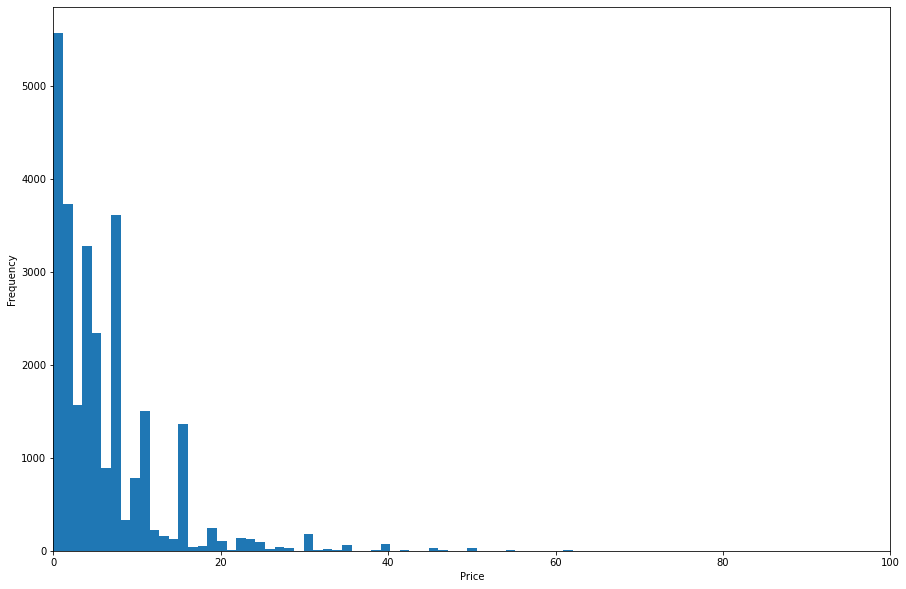

In [20]:

plt.figure()
price.plot(kind = 'hist', bins = 100, xlim=(0,100), figsize=(15,10))
plt.xlabel('Price')
plt.show()